In [1]:
from mapepire_python.client.sql_job import SQLJob
from mapepire_python.types import DaemonServer
import pandas as pd

In [16]:
user = input('user: ')
pw = input('password: ')

In [17]:
creds = DaemonServer(
    host="localhost",
    port=8085,
    user=user,
    password=pw,
    ignoreUnauthorized=True,
)

job = SQLJob()
res = job.connect(creds)
query = job.query("select * from sample.employee")
result = query.run(rows_to_fetch=5)
result

{'id': 'query3',
 'has_results': True,
 'update_count': -1,
 'metadata': {'column_count': 14,
  'job': '330955/QUSER/QZDASOINIT',
  'columns': [{'name': 'EMPNO',
    'type': 'CHAR',
    'display_size': 6,
    'label': 'EMPNO'},
   {'name': 'FIRSTNME',
    'type': 'VARCHAR',
    'display_size': 12,
    'label': 'FIRSTNME'},
   {'name': 'MIDINIT', 'type': 'CHAR', 'display_size': 1, 'label': 'MIDINIT'},
   {'name': 'LASTNAME',
    'type': 'VARCHAR',
    'display_size': 15,
    'label': 'LASTNAME'},
   {'name': 'WORKDEPT',
    'type': 'CHAR',
    'display_size': 3,
    'label': 'WORKDEPT'},
   {'name': 'PHONENO', 'type': 'CHAR', 'display_size': 4, 'label': 'PHONENO'},
   {'name': 'HIREDATE',
    'type': 'DATE',
    'display_size': 10,
    'label': 'HIREDATE'},
   {'name': 'JOB', 'type': 'CHAR', 'display_size': 8, 'label': 'JOB'},
   {'name': 'EDLEVEL',
    'type': 'SMALLINT',
    'display_size': 6,
    'label': 'EDLEVEL'},
   {'name': 'SEX', 'type': 'CHAR', 'display_size': 1, 'label': 'SEX

In [18]:
df = pd.DataFrame(result['data'])
df

,EMPNO,FIRSTNME,MIDINIT,LASTNAME,WORKDEPT,PHONENO,HIREDATE,JOB,EDLEVEL,SEX,BIRTHDATE,SALARY,BONUS,COMM
0,000010,CHRISTINE,I,HAAS,A00,3978,01/01/65,PRES,18,F,None,52750.0,1000.0,4220.0
1,000020,MICHAEL,L,THOMPSON,B01,3476,10/10/73,MANAGER,18,M,02/02/48,41250.0,800.0,3300.0
2,000030,SALLY,A,KWAN,C01,4738,04/05/75,MANAGER,20,F,05/11/41,38250.0,800.0,3060.0
3,000050,JOHN,B,GEYER,E01,6789,08/17/49,MANAGER,16,M,None,40175.0,800.0,3214.0
4,000060,IRVING,F,STERN,D11,6423,09/14/73,MANAGER,16,M,07/07/45,32250.0,500.0,2580.0


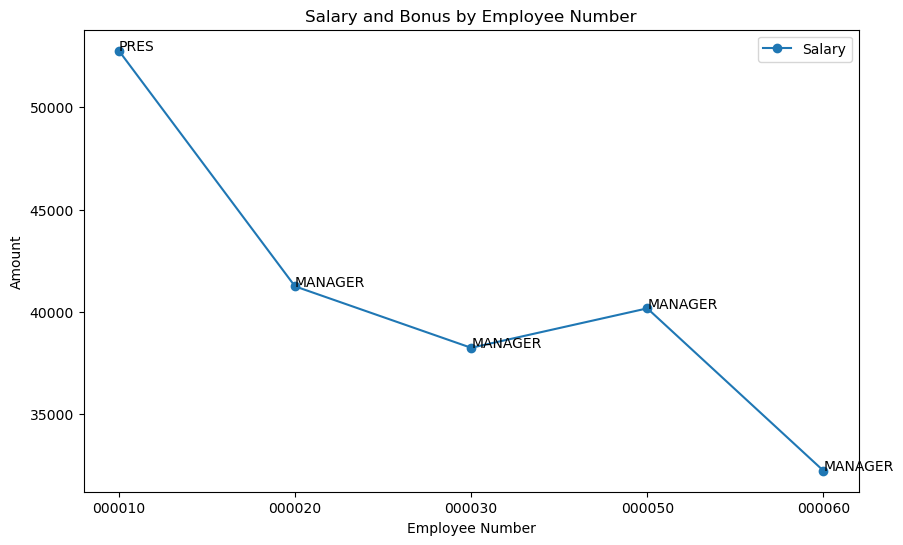

In [19]:
import matplotlib.pyplot as plt
# Create a new figure
plt.figure(figsize=(10,6))

# Plot salary and bonus against EMPNO
plt.plot(df['EMPNO'], df['SALARY'], '-o', label='Salary')

# Add labels for job titles and education level
for i, txt in enumerate(df['JOB']):
    plt.annotate(txt, (df['EMPNO'][i], df['SALARY'][i]))
for i, txt in enumerate(df['EDLEVEL']):
    plt.annotate(txt, (df['EMPNO'][i], df['BONUS'][i]))

# Add title and labels
plt.title('Salary and Bonus by Employee Number')
plt.xlabel('Employee Number')
plt.ylabel('Amount')

# Add a legend
plt.legend()

# Show the plot
plt.show()